# Amazon Web Services - Use Case 1 : Default of credit card clients

## K-NN, SVM and Random Forest Classification Models 

In this notebook, we build, train to predict the target label Y Did the person pay default payment next month (Yes=1 or No=0 )
1. <a href="#1">Read the dataset</a>
2. <a href="#2">Exploratory Data Analysis</a>
3. <a href="#3">Select features to build the model</a>
4. <a href="#6">Train the classifier</a>


## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

Let's read the dataset into a dataframe, using Pandas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns

# to prevent truncating the columns of the pandas dataframe
pd.set_option('display.max_columns', None)
df = pd.read_excel('default of credit card clients.xls', index_col=0, header=[0, 1])

In [2]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,female,university,married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,female,university,single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,female,university,single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,female,university,married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,male,university,married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


## 2. <a name="2">Exploratory Data Analysis</a>
(<a href="#0">Go to top</a>)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   (X1, LIMIT_BAL)                  30000 non-null  int64 
 1   (X2, SEX)                        30000 non-null  object
 2   (X3, EDUCATION)                  29669 non-null  object
 3   (X4, MARRIAGE)                   29677 non-null  object
 4   (X5, AGE)                        30000 non-null  int64 
 5   (X6, PAY_0)                      30000 non-null  int64 
 6   (X7, PAY_2)                      30000 non-null  int64 
 7   (X8, PAY_3)                      30000 non-null  int64 
 8   (X9, PAY_4)                      30000 non-null  int64 
 9   (X10, PAY_5)                     30000 non-null  int64 
 10  (X11, PAY_6)                     30000 non-null  int64 
 11  (X12, BILL_AMT1)                 30000 non-null  int64 
 12  (X13, BILL_AMT2)                

Let's modify some of the data type

In [4]:
for col in ['X1','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23']:
    df[col] = df[col].astype('float64')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   (X1, LIMIT_BAL)                  30000 non-null  float64
 1   (X2, SEX)                        30000 non-null  object 
 2   (X3, EDUCATION)                  29669 non-null  object 
 3   (X4, MARRIAGE)                   29677 non-null  object 
 4   (X5, AGE)                        30000 non-null  int64  
 5   (X6, PAY_0)                      30000 non-null  int64  
 6   (X7, PAY_2)                      30000 non-null  int64  
 7   (X8, PAY_3)                      30000 non-null  int64  
 8   (X9, PAY_4)                      30000 non-null  int64  
 9   (X10, PAY_5)                     30000 non-null  int64  
 10  (X11, PAY_6)                     30000 non-null  int64  
 11  (X12, BILL_AMT1)                 30000 non-null  float64
 12  (X13, BILL_AMT2)  

In [6]:
# print basic statistics for numerical columns
df.describe()

,X1,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.518833,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,9.528019,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,267.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Let's visualize the dataset to have overall overview

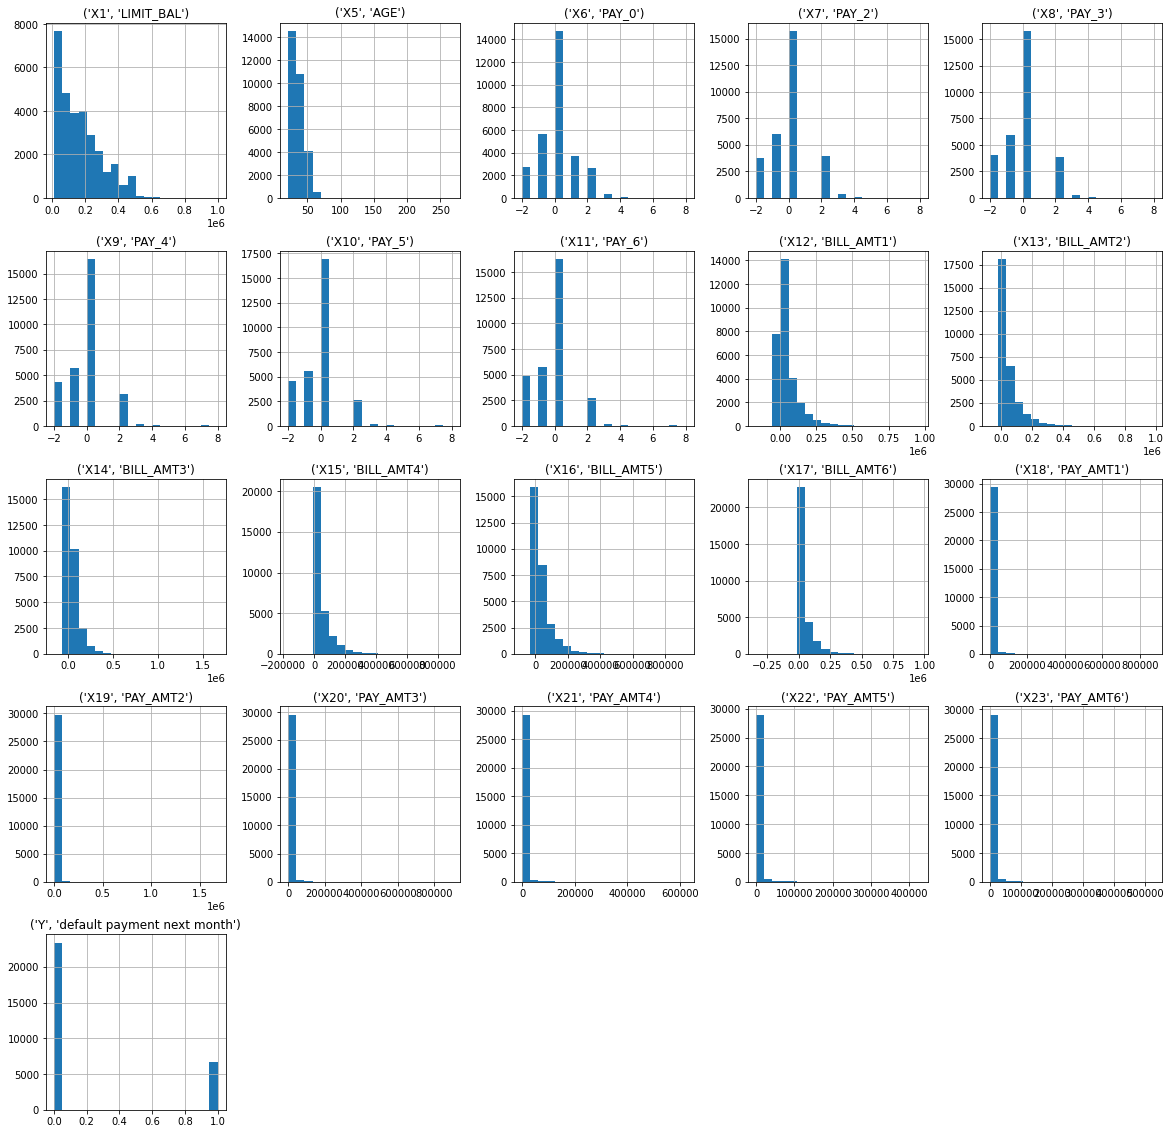

In [7]:
df.hist(figsize=(20,20), bins=20);

In [8]:
df['X5'].value_counts().sort_values()

AGE
267       1
228       1
140       1
152       1
74        1
       ... 
26     1255
30     1395
28     1408
27     1477
29     1605
Length: 63, dtype: int64

It's obvious that we have outliers in age column at 267, 228, 235, 140, 149, 152 and 126, Let's modify these values, here I removed the two hundreds and one hundred value cause I think it has been added by mistak   

In [9]:
df['X5'] = df['X5'].replace([267,228,235,140,149,152,126],[67,28,35,40,49,52,26])

In [10]:
df['X5'].value_counts().sort_values()

AGE
79        1
74        1
75        3
72        3
71        3
73        4
68        5
70       10
69       15
67       16
65       24
66       25
64       31
63       31
62       44
61       56
60       67
21       67
59       83
57      122
58      122
56      178
55      209
54      247
52      304
53      325
51      340
50      411
49      452
48      466
47      501
22      560
46      570
45      617
43      670
44      700
42      794
41      824
40      870
23      931
38      944
39      954
37     1041
36     1108
35     1113
24     1127
33     1146
32     1158
34     1162
25     1186
31     1217
26     1256
30     1395
28     1409
27     1477
29     1605
dtype: int64

In [11]:
df.isna().sum()

     ID                        
X1   LIMIT_BAL                       0
X2   SEX                             0
X3   EDUCATION                     331
X4   MARRIAGE                      323
X5   AGE                             0
X6   PAY_0                           0
X7   PAY_2                           0
X8   PAY_3                           0
X9   PAY_4                           0
X10  PAY_5                           0
X11  PAY_6                           0
X12  BILL_AMT1                       0
X13  BILL_AMT2                       0
X14  BILL_AMT3                       0
X15  BILL_AMT4                       0
X16  BILL_AMT5                       0
X17  BILL_AMT6                       0
X18  PAY_AMT1                        0
X19  PAY_AMT2                        0
X20  PAY_AMT3                        0
X21  PAY_AMT4                        0
X22  PAY_AMT5                        0
X23  PAY_AMT6                        0
Y    default payment next month      0
dtype: int64

In [12]:
df['X3'].value_counts()

EDUCATION      
university         14030
graduate school    10585
high school         4916
others               124
0                     14
dtype: int64

In [13]:
df['X4'].value_counts()

MARRIAGE
single      15964
married     13659
0              54
dtype: int64

Let's fill the missing values with the most frequent in EDUCATION and MARRIAGE

In [14]:
df['X3'] = df['X3'].fillna(df['X3'].mode().iloc[0])

In [15]:
df['X4'] = df['X4'].fillna(df['X4'].mode().iloc[0])

In [16]:
df.isna().sum()

     ID                        
X1   LIMIT_BAL                     0
X2   SEX                           0
X3   EDUCATION                     0
X4   MARRIAGE                      0
X5   AGE                           0
X6   PAY_0                         0
X7   PAY_2                         0
X8   PAY_3                         0
X9   PAY_4                         0
X10  PAY_5                         0
X11  PAY_6                         0
X12  BILL_AMT1                     0
X13  BILL_AMT2                     0
X14  BILL_AMT3                     0
X15  BILL_AMT4                     0
X16  BILL_AMT5                     0
X17  BILL_AMT6                     0
X18  PAY_AMT1                      0
X19  PAY_AMT2                      0
X20  PAY_AMT3                      0
X21  PAY_AMT4                      0
X22  PAY_AMT5                      0
X23  PAY_AMT6                      0
Y    default payment next month    0
dtype: int64

I have noticed that EDUCATION and MARRIAGE have a labels 0 that is undocumented, let's replace it with others.

In [17]:
df['X3'] = df['X3'].replace(0,'others')

In [18]:
df['X3'].value_counts()

EDUCATION      
university         14361
graduate school    10585
high school         4916
others               138
dtype: int64

In [19]:
df['X4'] = df['X4'].replace(0,'others')

In [20]:
df['X4'].value_counts()

MARRIAGE
single      16287
married     13659
others         54
dtype: int64

In [21]:
# Number of unique elements in dataset
df.nunique()

     ID                        
X1   LIMIT_BAL                        81
X2   SEX                               2
X3   EDUCATION                         4
X4   MARRIAGE                          3
X5   AGE                              56
X6   PAY_0                            11
X7   PAY_2                            11
X8   PAY_3                            11
X9   PAY_4                            11
X10  PAY_5                            10
X11  PAY_6                            10
X12  BILL_AMT1                     22723
X13  BILL_AMT2                     22346
X14  BILL_AMT3                     22026
X15  BILL_AMT4                     21548
X16  BILL_AMT5                     21010
X17  BILL_AMT6                     20604
X18  PAY_AMT1                       7943
X19  PAY_AMT2                       7899
X20  PAY_AMT3                       7518
X21  PAY_AMT4                       6937
X22  PAY_AMT5                       6897
X23  PAY_AMT6                       6939
Y    default payment next

In [22]:
df.duplicated().sum()

36

In [23]:
df.drop_duplicates(inplace=True)

In [24]:
df.duplicated().sum()

0

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29964 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   (X1, LIMIT_BAL)                  29964 non-null  float64
 1   (X2, SEX)                        29964 non-null  object 
 2   (X3, EDUCATION)                  29964 non-null  object 
 3   (X4, MARRIAGE)                   29964 non-null  object 
 4   (X5, AGE)                        29964 non-null  int64  
 5   (X6, PAY_0)                      29964 non-null  int64  
 6   (X7, PAY_2)                      29964 non-null  int64  
 7   (X8, PAY_3)                      29964 non-null  int64  
 8   (X9, PAY_4)                      29964 non-null  int64  
 9   (X10, PAY_5)                     29964 non-null  int64  
 10  (X11, PAY_6)                     29964 non-null  int64  
 11  (X12, BILL_AMT1)                 29964 non-null  float64
 12  (X13, BILL_AMT2)  

## 3. <a name="3">Select features to build the model</a>
(<a href="#0">Go to top</a>)


Text(0.5, 1.0, 'dataset correlation')

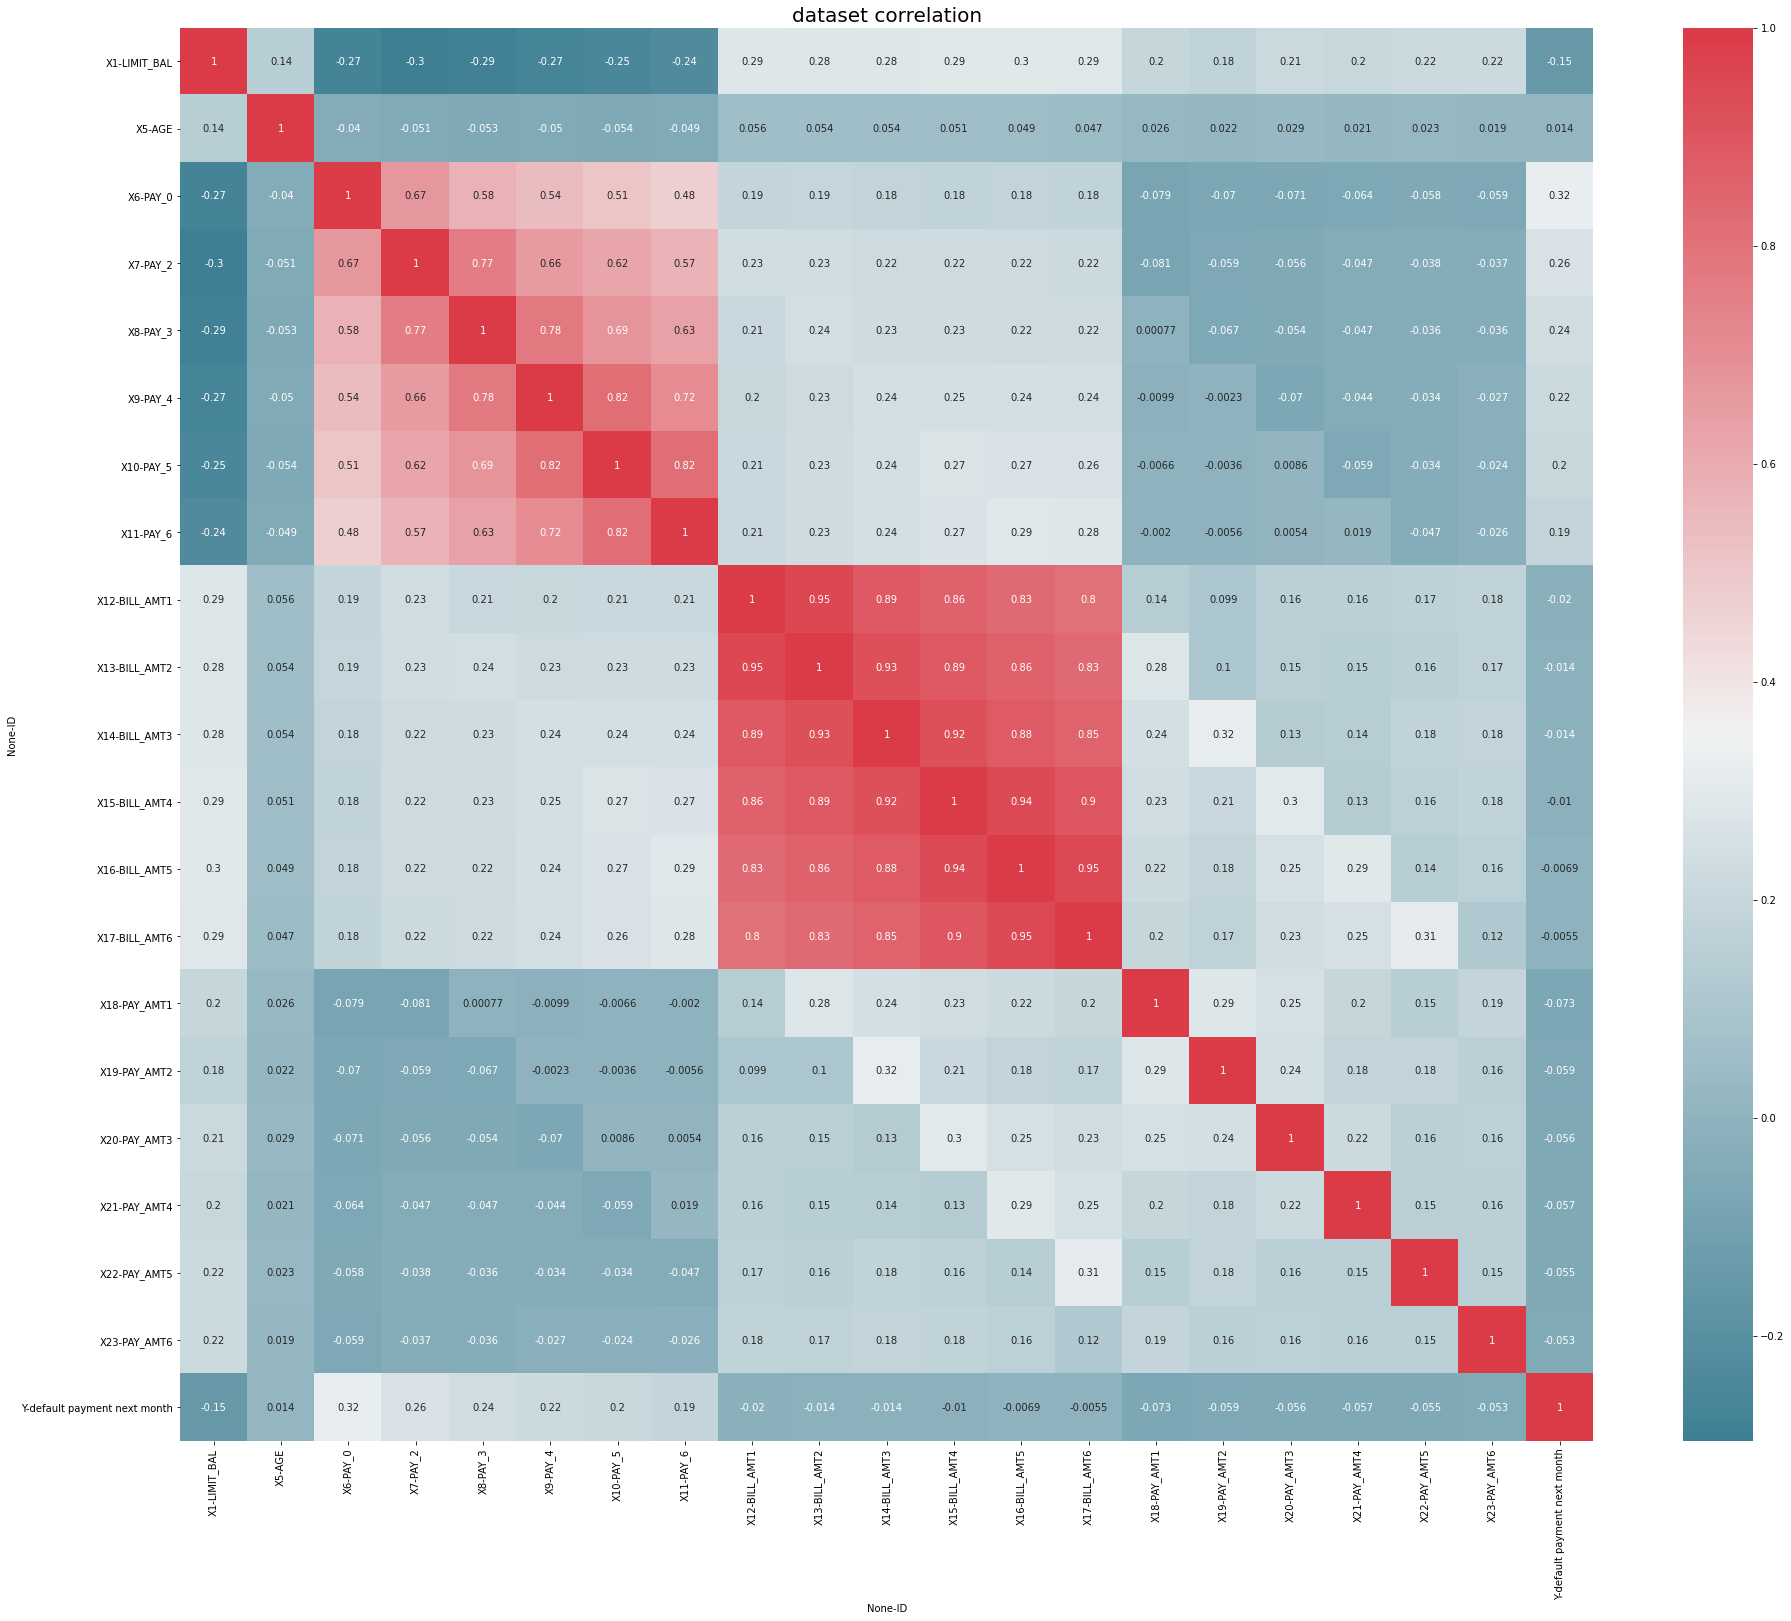

In [26]:
# Display correlation 
f, ax = plt.subplots(figsize=(32, 26))
corr = df.corr()
mp = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot = True)
mp.set_title(label='dataset correlation', fontsize=20)

- BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, & BILL_AMT6 are highly correlated, I let them for now  

Let's select our target value 

In [27]:
y = df['Y']
y

ID,default payment next month
1,1
2,1
3,0
4,0
5,0
...,...
29996,0
29997,0
29998,1
29999,1


In [28]:
X = df.drop('Y', axis =1)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [29]:
X = pd.get_dummies(data=X, columns=['X2', 'X3', 'X4'])
X.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,"(X1, LIMIT_BAL)","(X5, AGE)","(X6, PAY_0)","(X7, PAY_2)","(X8, PAY_3)","(X9, PAY_4)","(X10, PAY_5)","(X11, PAY_6)","(X12, BILL_AMT1)","(X13, BILL_AMT2)","(X14, BILL_AMT3)","(X15, BILL_AMT4)","(X16, BILL_AMT5)","(X17, BILL_AMT6)","(X18, PAY_AMT1)","(X19, PAY_AMT2)","(X20, PAY_AMT3)","(X21, PAY_AMT4)","(X22, PAY_AMT5)","(X23, PAY_AMT6)","('X2', 'SEX')_female","('X2', 'SEX')_male","('X3', 'EDUCATION')_graduate school","('X3', 'EDUCATION')_high school","('X3', 'EDUCATION')_others","('X3', 'EDUCATION')_university","('X4', 'MARRIAGE')_married","('X4', 'MARRIAGE')_others","('X4', 'MARRIAGE')_single"
1,20000.0,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,1,0,0
2,120000.0,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,0,0,0,0,1,0,0,1
3,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,1,0,0,0,0,1,0,0,1
4,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,1,0,0,0,0,1,1,0,0
5,50000.0,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,1,0,0,0,1,1,0,0


In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29964 entries, 1 to 30000
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   (X1, LIMIT_BAL)                      29964 non-null  float64
 1   (X5, AGE)                            29964 non-null  int64  
 2   (X6, PAY_0)                          29964 non-null  int64  
 3   (X7, PAY_2)                          29964 non-null  int64  
 4   (X8, PAY_3)                          29964 non-null  int64  
 5   (X9, PAY_4)                          29964 non-null  int64  
 6   (X10, PAY_5)                         29964 non-null  int64  
 7   (X11, PAY_6)                         29964 non-null  int64  
 8   (X12, BILL_AMT1)                     29964 non-null  float64
 9   (X13, BILL_AMT2)                     29964 non-null  float64
 10  (X14, BILL_AMT3)                     29964 non-null  float64
 11  (X15, BILL_AMT4)            

In [31]:
from sklearn.model_selection import train_test_split
# Get 80% of the data for training; the remaining 20% will be for validation and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(f"Length of X_train is: {X_train.shape}")
print(f"Length of y_train is: {y_train.shape}")
print(f"Length of X_test is: {X_test.shape}")
print(f"Length of y_test is: {y_test.shape}")

Length of X_train is: (23971, 29)
Length of y_train is: (23971, 1)
Length of X_test is: (5993, 29)
Length of y_test is: (5993, 1)


In [32]:
# Feature scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 6. <a name="6">Train the classifier</a>
(<a href="#0">Go to top</a>)

Let's first train and test the classifier on the train and the test sets using different alogrithms.  

### Training the K-NN model on the Training set

In [33]:
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

In [34]:
# Using cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_KNN, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

Accuracy: 78.76 %


In [35]:
classifier_KNN.fit(X_train, y_train)
y_pred_KNN = classifier_KNN.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred_KNN)
print(cm)
print("Accuracy {:.2f} %".format( 100 * accuracy_score(y_test, y_pred_KNN)))
print(classification_report(y_test, y_pred_KNN))

[[4329  390]
 [ 828  446]]
Accuracy 79.68 %
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      4719
           1       0.53      0.35      0.42      1274

    accuracy                           0.80      5993
   macro avg       0.69      0.63      0.65      5993
weighted avg       0.77      0.80      0.78      5993



### Training the Kernel SVM model on the Training set

In [37]:
from sklearn.svm import SVC
classifier_SVM = SVC(kernel = 'rbf', random_state = 0)
classifier_SVM.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [38]:
y_pred_SVM = classifier_SVM.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred_SVM)
print(cm)
print("Accuracy {:.2f} %".format( 100 * accuracy_score(y_test, y_pred_SVM)))
print(classification_report(y_test, y_pred_SVM))

[[4521  198]
 [ 853  421]]
Accuracy 82.46 %
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      4719
           1       0.68      0.33      0.44      1274

    accuracy                           0.82      5993
   macro avg       0.76      0.64      0.67      5993
weighted avg       0.81      0.82      0.80      5993



### Training the Random Forest Classification model on the Training set

In [40]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier_RF.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


y_pred_RF = classifier_RF.predict(X_test)
cm = confusion_matrix(y_test, y_pred_RF)
print(cm)
print("Accuracy {:.2f} %".format( 100 * accuracy_score(y_test, y_pred_RF)))
print(classification_report(y_test, y_pred_RF))

[[4448  271]
 [ 867  407]]
Accuracy 81.01 %
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4719
           1       0.60      0.32      0.42      1274

    accuracy                           0.81      5993
   macro avg       0.72      0.63      0.65      5993
weighted avg       0.79      0.81      0.79      5993

